# CS 2704 – Final Project

**SCHEDULE**

Mar 29 (Sat): Submit proposal (individual submission)

– Apr 9 (Wed): Final presentation

– Apr 23 (Wed): Final report/presentation



**Chosen Datasets:**

– https://data.worldbank.org/indicator/NY.GDP.PCAP.CD | World Bank Group

– https://gco.iarc.fr/survival/survcan/dataviz/table | World Health Organization


**Github Repository:**

– https://github.com/ChristianDenniss/GDP-cancer-survival-analysis

# Group Members

Christian Dennis

Hadi Akbar

Rudolph Stephen


# Hypothesis

**Brief Background**:

GDP per capita could explain how well a country is equipped to provide advanced medical care for late-stage cancer patients, including access to cutting-edge treatments, specialized healthcare facilities, and early interventions.

**Statement**:

The survival rate of late-stage cancer has a strong correlation with GDP per capita, suggesting that higher economic resources may contribute to better cancer treatment and improved patient outcomes.

**Challenges in Data Collection / Hypothesis Adjustment**:

Initially, we hypothesized that a countries GDP per capita strongly correlates with the survival rate of late-stage cancer, because wealthier countries are better equipped to provide advanced medical care. However, as we began collecting data, we found that reliable statistics specifically on late-stage cancer survival were difficult to obtain, making it challenging to test our hypothesis effectively. Given these limitations, we decided to broaden our focus to overall cancer survival rates rather than just late-stage cases. While this adjustment changes the specificity of our hypothesis, the core idea remains the same: higher economic resources may contribute to better cancer treatment and improved patient outcomes.

**New Statement**

The survival rate of general cancer diagnoses among both sexes has a strong correlation with GDP per capita, suggesting that higher economic resources may contribute to better overall cancer treatment and improved patient outcomes.


**Plan for testing Hypothesis**:

Collect Data – Gather countries general cancer survival rates data (WHO, GCO, CONCORD) and GDP per capita (World Bank).

Merge & Clean Data – Standardize country names and handle missing values if needed

Analyze Correlation – Use *To-Be-Determind*
to test the relationship.

Visualize Results – Create scatter plots and statistical summaries.

Interpret Findings – Assess significance (p < 0.05) and consider confounding factors.

# Data Explanation

##Meta Data##

**GDP Meta Data:**
- Country Name Column; This indicates the geographical entity for which the data is provided.

- Country Code Column;  The standardized ISO 3166-1 alpha-3 character code representing the country or region. These codes are part of international standards used to represent countries and regions. ISO 3166-1 alpha-3 is a three-letter code that uniquely identifies a country or region, these three letters are typically derived from the country's name in English and are designed to be easy to use and recognize internationally.

- Indicator Name; The name of the indicator being measured, this column specifies the type of economic data being provided. In our case, the indicator is GDP per capita expressed in current U.S. dollars, for the year in question.

- Indicator Code; Similar to country code it is a abreviated code to uniquely identify an indicator in the data set, in our case they are all NY.GDP.PCAP.CD.

- Year; The differet years from which the GDP data was recorded

**Cancer Survival Meta Data:**

- Cancer Code (ICD-10):
The alphanumeric code from the International Classification of Diseases (ICD-10) that identifies the specific type of cancer. ***We don't care about cancer type in this comparison so we can disregard this and the Cancer Label meta data that is next.***

- Cancer Label:
The name of the cancer type corresponding to the ICD-10 code (e.g., lung cancer, breast cancer).

- Country Code (ISO/UN):
The numerical country code (rather than the standard alpha-3) representing the country or region for the data, as per ISO 3166-1 numeric standards. ***We want to work in ISO 3166 so we will convert these.***

- Country:
The full name of the country or region for which the cancer survival data is reported.

- Sex:
The gender classification (male, female, or both sexes) for which the cancer survival data is provided. ***We only want data listed for BOTH sexes***

- Net Survival (%):
The percentage of individuals surviving a specific cancer over a given time period, adjusted for competing causes of death.

- Confidence Interval:
The range within which the true survival rate is expected to fall, indicating the reliability of the net survival percentage.

##Data Source##

**World GDP Data**
- Source: Publically available, World Bank Group, World Development Indicators, World Bank national accounts data, and OECD National Accounts data files.
- [Website](https://data.worldbank.org/indicator/NY.GDP.PCAP.CD)

**Cancer Survival Data**
- Source: Publically available, World Health Organization, International agency for research on cancer.
- [Website](https://gco.iarc.fr/survival/survcan/dataviz/table)


##Excel Data Format Images##

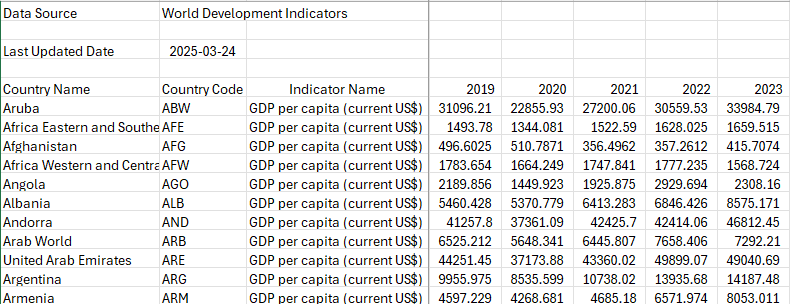

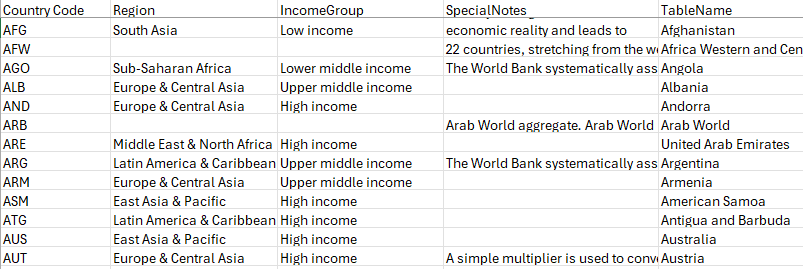

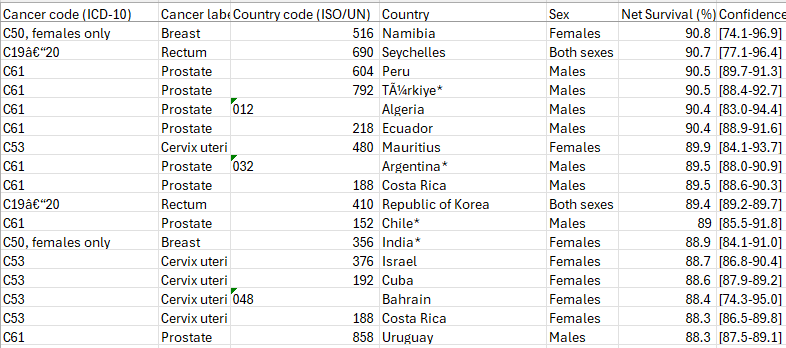

##Data Cleaning/Pruning, Adjusting, Harmonization##

**Cleaning**: As you can probably tell based on the images from our original raw datasets we must prune the null value entries, the data collected for regional areas and not countries in specific, and all the data involving only male or females for Cancer survival, we want to only use the data for both sexes.

**Adjusting**: The Cancer survival data uses a numerical country code instead of ISO 3166-1 alpha-3 character code so we must convert it to this format.

**Harmonization**: As our data files give us many years we must make sure we are using and comparing data collected within the same periods across the two sets, we'll choose 2010 as it's one of the most consistent years and relatively recent. We must combine the different types into one to weight them



# Descriptive Analytics

blah


Saving pruned cancer data.xlsx to pruned cancer data (13).xlsx


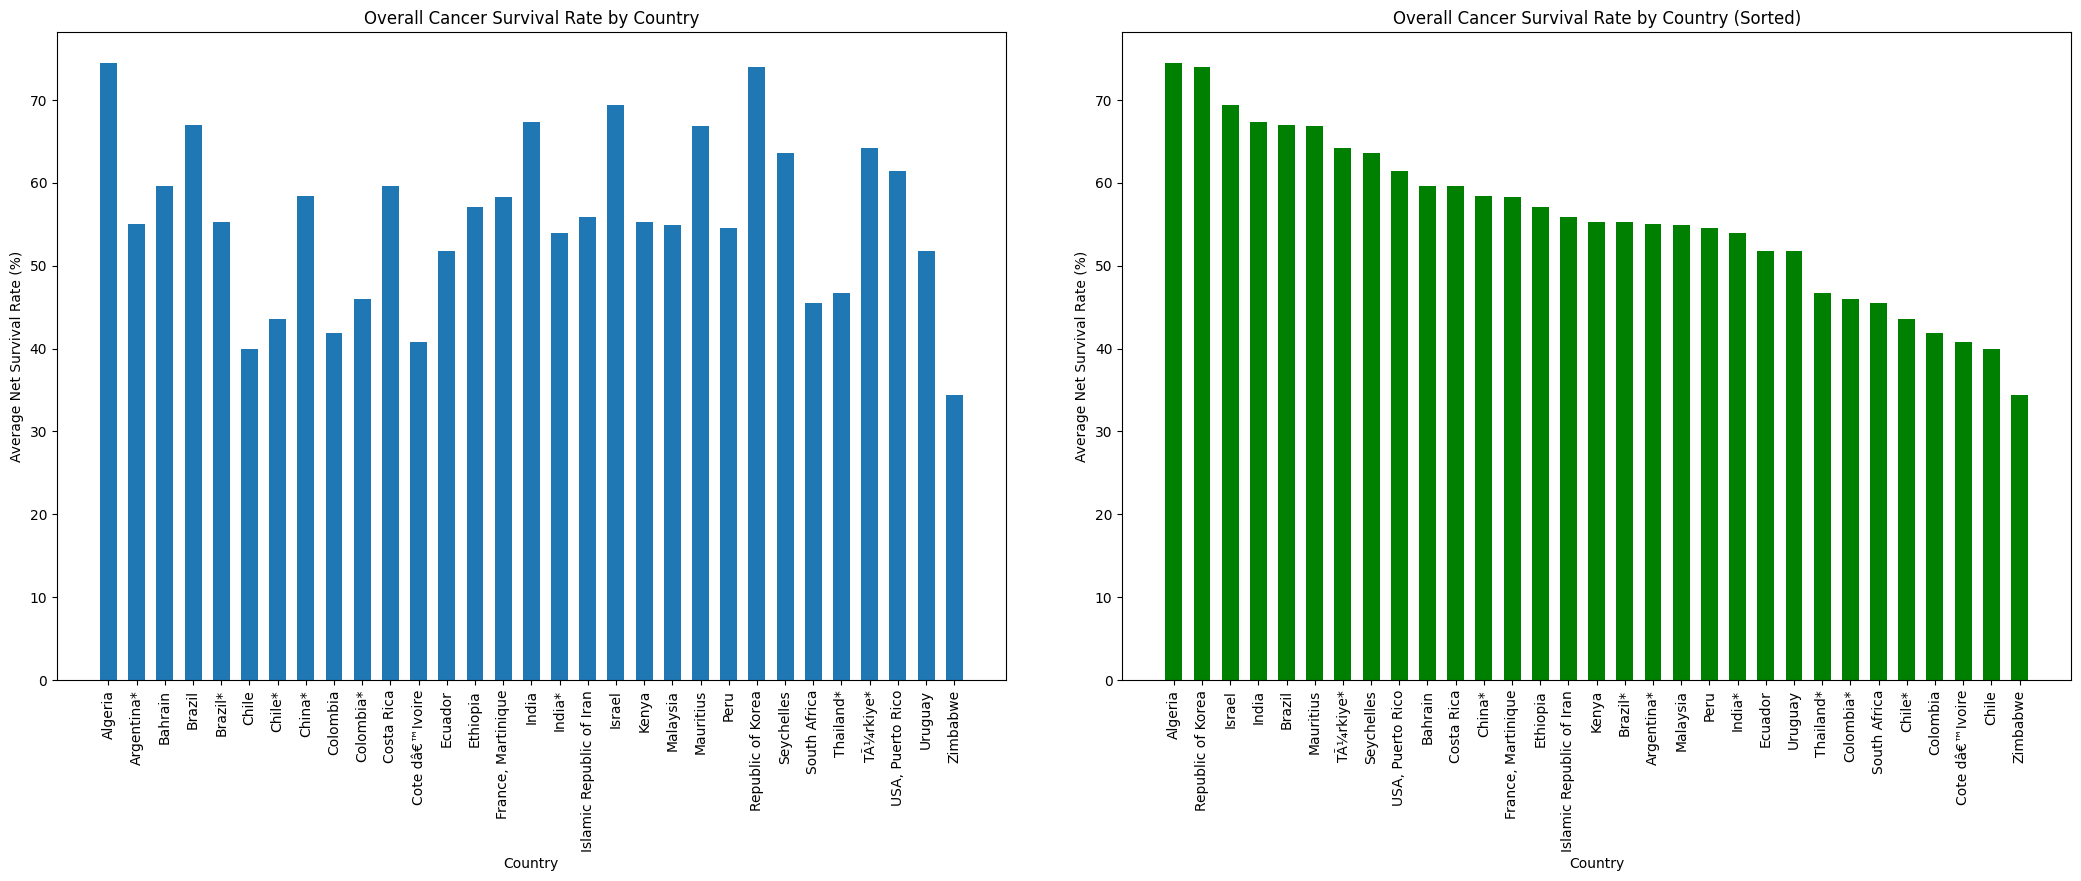

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [18]:
from google.colab import files
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Upload the Excel file
uploaded = files.upload()

# Step 2: Read the Excel file into a DataFrame, specify the engine explicitly
file_path = list(uploaded.keys())[0]  # Get the uploaded file name
df = pd.read_excel(file_path, engine='openpyxl')

# Step 3: Show the first few rows of the DataFrame to verify the structure
df.head()

# Step 4: Clean data (optional, depending on structure)
# Remove any rows where 'Net Survival (%)' is NaN or has missing values
df = df.dropna(subset=['Net Survival (%)'])

# Step 5: Calculate the overall cancer survival rate by country (simple average of 'Net Survival (%)')
overall_survival_rate = df.groupby('Country')['Net Survival (%)'].mean()

# Step 6: Sort survival rates by highest survival
sorted_survival_rate = overall_survival_rate.sort_values(ascending=False)

# Step 7: Create a figure with two subplots (one for original, one for sorted)
fig, axes = plt.subplots(1, 2, figsize=(22, 10))  # Increase figure size for more space

# Plot the original survival rates (unsorted)
axes[0].bar(overall_survival_rate.index, overall_survival_rate.values, width=0.6)  # Adjust bar width
axes[0].set_title('Overall Cancer Survival Rate by Country')
axes[0].set_xlabel('Country')
axes[0].set_ylabel('Average Net Survival Rate (%)')
axes[0].tick_params(axis='x', rotation=90)  # Rotate labels more for better visibility

# Plot the sorted survival rates (by highest survival)
axes[1].bar(sorted_survival_rate.index, sorted_survival_rate.values, width=0.6, color='green')  # Adjust bar width
axes[1].set_title('Overall Cancer Survival Rate by Country (Sorted)')
axes[1].set_xlabel('Country')
axes[1].set_ylabel('Average Net Survival Rate (%)')
axes[1].tick_params(axis='x', rotation=90)  # Rotate labels more for better visibility

# Increase space between plots by adjusting layout
plt.tight_layout(pad=5.0)  # Add more padding to prevent overlap

# Show the plot
plt.show()

# Step 8: Save the results to an Excel file and provide a download link
overall_survival_rate.to_excel('/content/overall_survival_rate_by_country.xlsx', index=True)
files.download('/content/overall_survival_rate_by_country.xlsx')


In [29]:
from google.colab import files
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Upload the Excel files CANCER, then GDP
uploaded_cancer = files.upload()  # Upload the cancer dataset
uploaded_gdp = files.upload()  # Upload the GDP dataset

# Step 2: Read the cancer data into a DataFrame
cancer_file_path = list(uploaded_cancer.keys())[0]
cancer_df = pd.read_excel(cancer_file_path, engine='openpyxl')

# Step 3: Read the GDP data into a DataFrame
gdp_file_path = list(uploaded_gdp.keys())[0]
gdp_df = pd.read_excel(gdp_file_path, engine='openpyxl')

# Step 4: Clean up the column names by stripping any extra spaces
cancer_df.columns = cancer_df.columns.str.strip()
gdp_df.columns = gdp_df.columns.str.strip()

# Step 5: Extract only the 'Country Name' from the cancer dataset
cancer_countries = cancer_df['Country Name'].unique()

# Step 6: Filter the GDP dataset to include only the countries in the cancer dataset
gdp_cleaned = gdp_df[['Country Name', 'GDP']]  # Keep only relevant columns
gdp_cleaned = gdp_cleaned[gdp_cleaned['Country Name'].isin(cancer_countries)]  # Filter by cancer countries

# Step 7: Drop rows where 'GDP' has missing values (NaN)
gdp_cleaned = gdp_cleaned.dropna(subset=['GDP'])

# Step 8: Sort the data by GDP in descending order
sorted_gdp = gdp_cleaned.sort_values(by='GDP', ascending=False)

# Step 9: Create a figure with two subplots (one for original, one for sorted)
fig, axes = plt.subplots(1, 2, figsize=(22, 10))  # Increased figure size for more space

# Plot the original GDP data (unsorted)
axes[0].bar(gdp_cleaned['Country Name'], gdp_cleaned['GDP'], width=0.6)
axes[0].set_title('GDP by Country (Unsorted) - 2010')
axes[0].set_xlabel('Country')
axes[0].set_ylabel('GDP (2010)')
axes[0].tick_params(axis='x', rotation=30)

# Plot the sorted GDP data (by highest GDP)
axes[1].bar(sorted_gdp['Country Name'], sorted_gdp['GDP'], width=0.6, color='green')
axes[1].set_title('GDP by Country (Sorted) - 2010')
axes[1].set_xlabel('Country')
axes[1].set_ylabel('GDP (2010)')
axes[1].tick_params(axis='x', rotation=90)

# Use tight_layout() to ensure the plots do not overlap
plt.tight_layout(pad=5.0)

# Show the plot
plt.show()

# Step 10: Save the results to an Excel file and provide a download link
gdp_cleaned.to_excel('/content/gdp_by_country_filtered_2010.xlsx', index=False)
files.download('/content/gdp_by_country_filtered_2010.xlsx')


Saving pruned cancer data.xlsx to pruned cancer data (14).xlsx


Saving GDP_pruned.xlsx to GDP_pruned (9).xlsx


KeyError: 'Country Name'